In [2]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [444]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)

import time
st = time.time()
N_v_points = 100
V_d_vec = np.linspace(280e-3,260e-3,N_v_points)
I_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3,sigma= (x[1] - x[0]))

battery_ind = []
max_prob_node = []
max_prob_dist = []

for i in range(N_v_points):
    if (i % 10 == 0):
        print i
    
    d = (V_d_vec[i],0,0.1,1)
    b1 = (-200e-3,0.3,0.1,1)
    b2 = (-200e-3,-0.3,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
    mu_l = (0.1,0.1+0.001)
    
    graph_model = (15,2)
    battery_weight = 200
    kT = 400e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
        max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
        graph_model = (max_prob_node_trial,2)
        print graph_model
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)[0]]
    max_prob_dist += [markov_graph.get_max_prob_node(G)[1]]

print time.time()-st

0
(11, 2)


/Users/ssk4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: ComplexWarning: Casting complex values to real discards the imaginary part


10
20
30
40
50
60
70
80
90
148.084619999


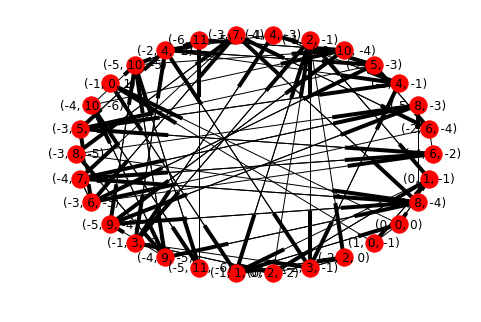

In [445]:
nx.draw_shell(G,with_labels=True)

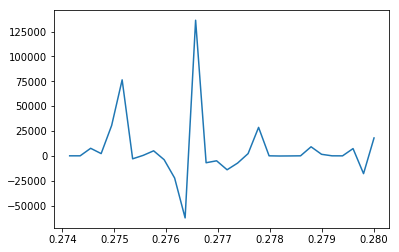

In [450]:
plt.plot(V_d_vec[:30],I_vec[:30])


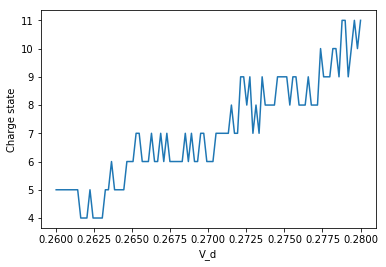

In [447]:
max_prob_node = np.array(max_prob_node)
plt.plot(V_d_vec,max_prob_node[:,1])
plt.xlabel('V_d')
plt.ylabel('Charge state')

In [400]:
size = []
n = 13
for i in range(n):
    plt_ind = np.argwhere(max_prob_node[:,1] == i)
    size += [plt_ind[-1] - plt_ind[0]]
    
plt.plot(range(n),size,'o')
size

IndexError: index -1 is out of bounds for axis 0 with size 0

In [276]:
data = []
for i in range(len(V_d_vec)):
    data += [[V_d_vec[i],I_vec[i],max_prob_node[i,1]]]
    
data = np.array(data)-
np.savetxt('/Users/ssk4/quantum-ml/ndot/ml/data/single_dot.txt',data)

SyntaxError: invalid syntax (<ipython-input-276-b7dcdf41a9cd>, line 5)

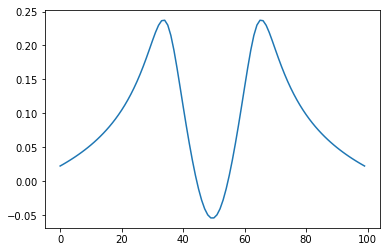

In [277]:
plt.plot(V)

In [273]:
np.array(G.nodes())[:,1]

array([1, 2, 0, 1])

In [272]:
np.array(max_prob_dist).reshape((100,4))


array([[  5.14232539e-15,   1.00000000e+00,   5.92366296e-43,
          2.56987776e-18],
       [  8.51598947e-14,   1.00000000e+00,   9.80992985e-42,
          4.25586680e-17],
       [  1.41029731e-12,   1.00000000e+00,   1.62458135e-40,
          7.04796256e-16],
       [  2.33553424e-11,   1.00000000e+00,   2.69040106e-39,
          1.16718353e-14],
       [  3.86778033e-10,   1.00000000e+00,   4.45546038e-38,
          1.93292370e-13],
       [  6.40526878e-09,   9.99999994e-01,  -3.63915417e-25,
          3.20103386e-12],
       [  1.06074960e-07,   9.99999894e-01,   1.22192257e-35,
          5.30109717e-11],
       [  1.75666004e-06,   9.99998242e-01,   2.02357306e-34,
          8.77890301e-10],
       [  2.90905149e-05,   9.99970895e-01,   3.35110867e-33,
          1.45377770e-08],
       [  4.81537790e-04,   9.99518222e-01,   5.54837446e-32,
          2.40590616e-07],
       [  7.91522185e-03,   9.92080838e-01,   9.15425313e-31,
          3.93991602e-06],
       [  1.16703477e

In [274]:
XX,YY = np.meshgrid(np.array(G.nodes())[:,1],V_d_vec)

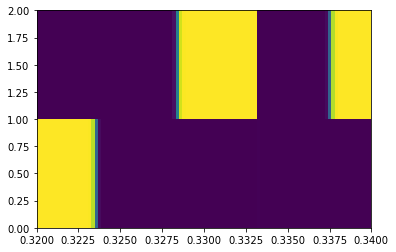

In [275]:
plt.pcolor(YY,XX,np.real(np.array(max_prob_dist).reshape((100,4))))

In [152]:
V_d_vec[32]

0.37646464646464645

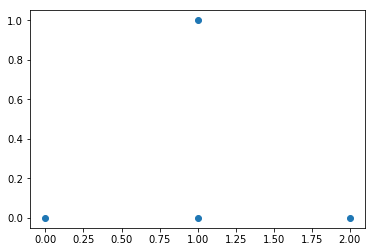

In [284]:
plt.plot(np.array(G.nodes())[:,1],max_prob_dist[15],'o')

In [345]:
a = np.array([1,2,3])
np.argwhere(a == 2)[0,0]
np.floor(0.5)

0.0